In [ ]:

# CELLULE DE PRÉPARATION 

import zipfile
import shutil
import os

#  Paramètres 
# Le nom exact du fichier zip 
ZIP_FILE_NAME = "carla-traffic-lights-images.zip"
# Le nom du dossier qui contiendra les données triées.
FINAL_DATASET_DIR = 'dataset'

#  Étape 1 : Vérification de la présence du fichier .zip 
print(f"--- Recherche du fichier '{ZIP_FILE_NAME}' dans le dossier du projet... ---")

if not os.path.exists(ZIP_FILE_NAME):
    # Message d'erreur clair et adapté pour une exécution locale
    print(f" ERREUR : Fichier '{ZIP_FILE_NAME}' introuvable !")
    print("\nSOLUTION :")
    print(f"1. Assurez-vous que le fichier '{ZIP_FILE_NAME}' a bien été téléchargé.")
    print("2. Assurez-vous d'avoir placé ce fichier .zip directement à la racine de votre dossier de projet VS Code.")
    print("3. Vérifiez que le nom du fichier est exactement le même (pas de '(1)' ou de majuscules en plus).")
else:
    print(f" Fichier '{ZIP_FILE_NAME}' trouvé !")

    # Étape 2 : Nettoyage et Décompression
    print("\n--- 2. Nettoyage des anciens dossiers (s'ils existent)... ---")
    if os.path.exists(FINAL_DATASET_DIR): 
        shutil.rmtree(FINAL_DATASET_DIR)
    if os.path.exists('temp_dataset'): 
        shutil.rmtree('temp_dataset')
    
    print("\n--- 3. Décompression du fichier .zip... ---")
    with zipfile.ZipFile(ZIP_FILE_NAME, 'r') as zip_ref:
        zip_ref.extractall("temp_dataset")
    print("Décompression terminée.")

    #  Étape 4 : Organisation des dossiers 
    print("\n--- 4. Organisation des dossiers... ---")
    # Le dataset Carla contient un dossier parent 'traffic_light_data'
    source_base_path = os.path.join("temp_dataset", "traffic_light_data")

    # Vérifier si ce dossier parent existe bien
    if not os.path.exists(source_base_path):
        print(f" ERREUR : La structure interne du .zip est inattendue. Le dossier 'traffic_light_data' est introuvable.")
    else:
        source_train_dir = os.path.join(source_base_path, 'train')
        source_val_dir = os.path.join(source_base_path, 'val')

        # Créer le dossier final 'dataset'
        os.makedirs(FINAL_DATASET_DIR, exist_ok=True)

        # Déplacer 'train' et renommer 'val' en 'validation'
        shutil.move(source_train_dir, os.path.join(FINAL_DATASET_DIR, 'train'))
        shutil.move(source_val_dir, os.path.join(FINAL_DATASET_DIR, 'validation'))

        print(f"Dossier 'train' déplacé vers '{os.path.join(FINAL_DATASET_DIR, 'train')}'")
        print(f"Dossier 'val' déplacé et renommé en '{os.path.join(FINAL_DATASET_DIR, 'validation')}'")

        # Étape 5 : Nettoyage final 
        shutil.rmtree("temp_dataset")
        # On ne supprime pas le zip, au cas où on voudrait relancer la préparation
        # os.remove(ZIP_FILE_NAME) 

        print("\n Préparation du jeu de données terminée avec succès !")
        print("Vous pouvez maintenant exécuter la cellule d'entraînement.")

--- Recherche du fichier 'carla-traffic-lights-images.zip' dans le dossier du projet... ---
 Fichier 'carla-traffic-lights-images.zip' trouvé !

--- 2. Nettoyage des anciens dossiers (s'ils existent)... ---

--- 3. Décompression du fichier .zip... ---
Décompression terminée.

--- 4. Organisation des dossiers... ---
Dossier 'train' déplacé vers 'dataset\train'
Dossier 'val' déplacé et renommé en 'dataset\validation'

 Préparation du jeu de données terminée avec succès !
Vous pouvez maintenant exécuter la cellule d'entraînement.


--- ANALYSE DU JEU DE DONNÉES PRÉPARÉ ---

Distribution des images dans le jeu d'entraînement :
- back: 517 images
- green: 559 images
- red: 564 images
- yellow: 503 images


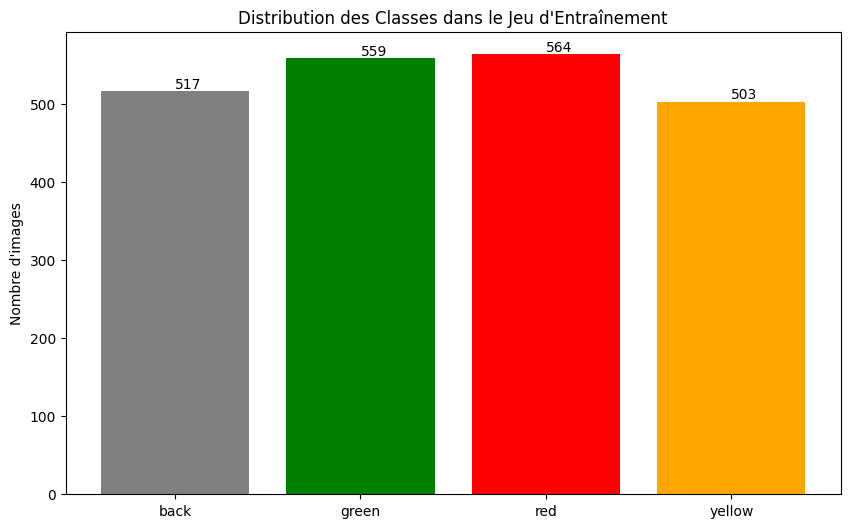


--- Exemples d'images du jeu de données ---


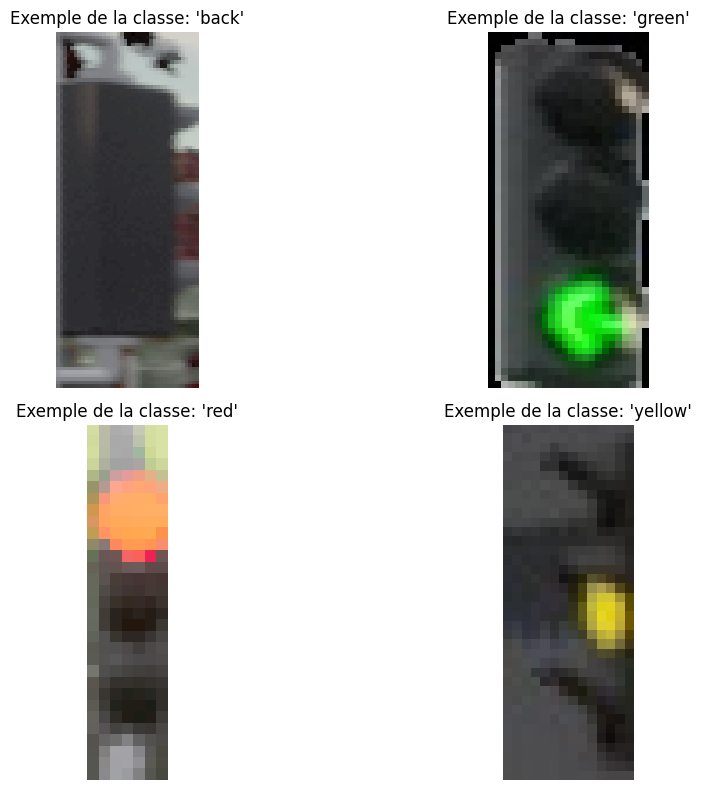

In [ ]:
# CELLULE D'ANALYSE DU DATASET

import matplotlib.pyplot as plt
import os
import random
import numpy as np

print("--- ANALYSE DU JEU DE DONNÉES PRÉPARÉ ---")

#  Paramètres 
TRAIN_DIR = 'dataset/train'
VALIDATION_DIR = 'dataset/validation'

# 1. Compter les images par classe 
def count_images(directory):
    counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            counts[class_name] = len(os.listdir(class_path))
    return counts

train_counts = count_images(TRAIN_DIR)
validation_counts = count_images(VALIDATION_DIR)

print("\nDistribution des images dans le jeu d'entraînement :")
for cls, count in train_counts.items():
    print(f"- {cls}: {count} images")

# 2. Créer un graphique à barres pour visualiser la distribution 
labels = list(train_counts.keys())
train_values = list(train_counts.values())

fig, ax = plt.subplots(figsize=(10, 6))
bar_positions = np.arange(len(labels))
bars = ax.bar(bar_positions, train_values, color=['grey', 'green', 'red', 'orange'])

ax.set_ylabel('Nombre d\'images')
ax.set_title('Distribution des Classes dans le Jeu d\'Entraînement')
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)

# Ajouter le nombre exact au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

plt.show()

# 3. Afficher quelques exemples d'images 
print("\n--- Exemples d'images du jeu de données ---")
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(train_counts.keys()):
    class_path = os.path.join(TRAIN_DIR, class_name)
    # Choisir une image aléatoire dans le dossier de la classe
    random_image = random.choice(os.listdir(class_path))
    img = plt.imread(os.path.join(class_path, random_image))
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(f"Exemple de la classe: '{class_name}'")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:

# CELLULE D'ENTRAÎNEMENT 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, Lambda
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam #  pour contrôler le learning rate
from sklearn.utils import class_weight
import numpy as np

# Paramètres 
TRAIN_DIR, VALIDATION_DIR = 'dataset/train', 'dataset/validation'
MODEL_PATH = 'traffic_light_custom_finetuned.keras' # Nouveau nom pour le modèle final
IMG_HEIGHT, IMG_WIDTH, BATCH_SIZE = 128, 128, 32
# On divise l'entraînement en deux phases
INITIAL_EPOCHS = 15
FINE_TUNE_EPOCHS = 5
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

#  Chargement et préparation des données 

train_dataset = image_dataset_from_directory(TRAIN_DIR, labels='inferred', label_mode='categorical', image_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, shuffle=True)
validation_dataset = image_dataset_from_directory(VALIDATION_DIR, labels='inferred', label_mode='categorical', image_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, shuffle=False)
CLASS_NAMES = train_dataset.class_names
train_labels = np.concatenate([y for x, y in train_dataset], axis=0)
train_labels_indices = np.argmax(train_labels, axis=1)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_labels_indices), y=train_labels_indices)
class_weights_dict = dict(enumerate(class_weights))
print(f"Poids des classes : {class_weights_dict}")

# Fonction  pour l'augmentation 
def apply_random_brightness(x):
    return tf.image.random_brightness(x, 0.2)

#  Création de l'architecture du modèle 
data_augmentation = Sequential([RandomFlip("horizontal"), RandomRotation(0.2), RandomZoom(0.2), RandomContrast(0.2), Lambda(apply_random_brightness)], name="data_augmentation")

# On sépare le "corps" de la "tête"
# LE CORPS : Extracteur de caractéristiques
feature_extractor = Sequential([
    tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    data_augmentation,
    Rescaling(1./255),
    Conv2D(32, (3, 3), activation='relu', name='conv1'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu', name='conv2'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu', name='conv3'),
    MaxPooling2D(),
    Flatten()
], name='feature_extractor')

# LA TÊTE : Classifieur
classifier = Sequential([
    Dense(512, activation='relu', name='dense1'),
    Dropout(0.5),
    Dense(len(CLASS_NAMES), activation='softmax', name='output')
], name='classifier')

# On assemble le modèle final
model = Sequential([feature_extractor, classifier])

#   Phase 1 : Entraînement du modèle complet 
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
print("\n--- Phase 1: Entraînement du modèle complet (15 époques) ---")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=INITIAL_EPOCHS,
    class_weight=class_weights_dict
)

#   Phase 2 : Fine-Tuning de la tête 
print("\n--- Phase 2: Fine-Tuning de la tête de classification (5 époques) ---")
# On gèle le corps du modèle
feature_extractor.trainable = False

# On recompile le modèle avec un taux d'apprentissage plus faible pour affiner la tête
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# On continue l'entraînement là où il s'était arrêté
history_fine = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=TOTAL_EPOCHS,
    initial_epoch=history.epoch[-1], # On reprend à la fin de la phase 1
    class_weight=class_weights_dict
)

#  Sauvegarde 
model.save(MODEL_PATH)
print(f"\n Modèle FINAL avec Fine-Tuning sauvegardé : {MODEL_PATH}")

Found 2143 files belonging to 4 classes.
Found 383 files belonging to 4 classes.
Poids des classes : {0: np.float64(1.0362669245647969), 1: np.float64(0.9584078711985689), 2: np.float64(0.9499113475177305), 3: np.float64(1.0651093439363817)}

--- Phase 1: Entraînement du modèle complet (15 époques) ---
Epoch 1/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - accuracy: 0.6728 - loss: 0.8867 - val_accuracy: 0.9739 - val_loss: 0.1932
Epoch 2/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.9827 - loss: 0.0873 - val_accuracy: 0.9373 - val_loss: 0.2774
Epoch 3/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 218ms/step - accuracy: 0.9867 - loss: 0.0589 - val_accuracy: 0.9791 - val_loss: 0.1131
Epoch 4/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - accuracy: 0.9910 - loss: 0.0346 - val_accuracy: 0.9896 - val_loss: 0.0675
Epoch 5/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - accuracy: 0.9949 - loss: 0.0244 - val_accuracy: 0.9817 - val_loss: 0.1422
Epoch 6/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/ste

 Chargement du modèle...
 Modèle chargé avec succès !
 ERREUR : Le fichier '' est introuvable.


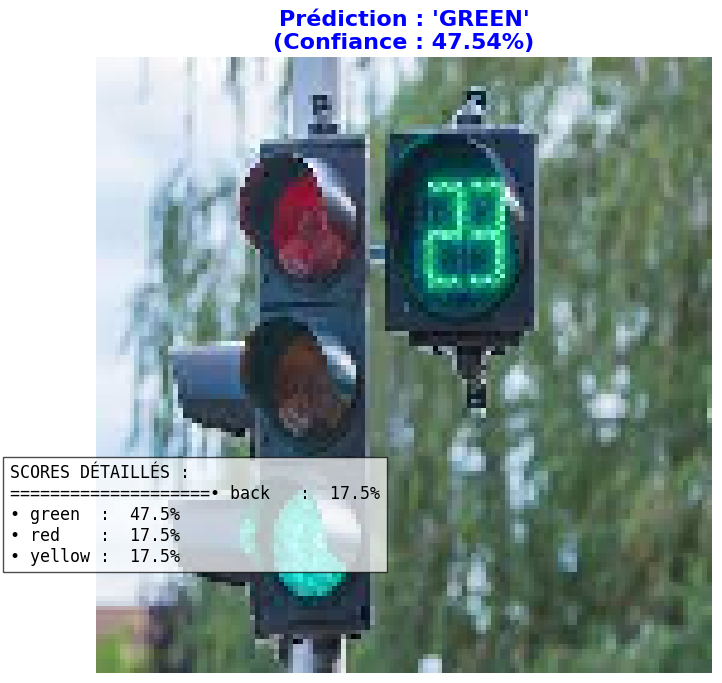

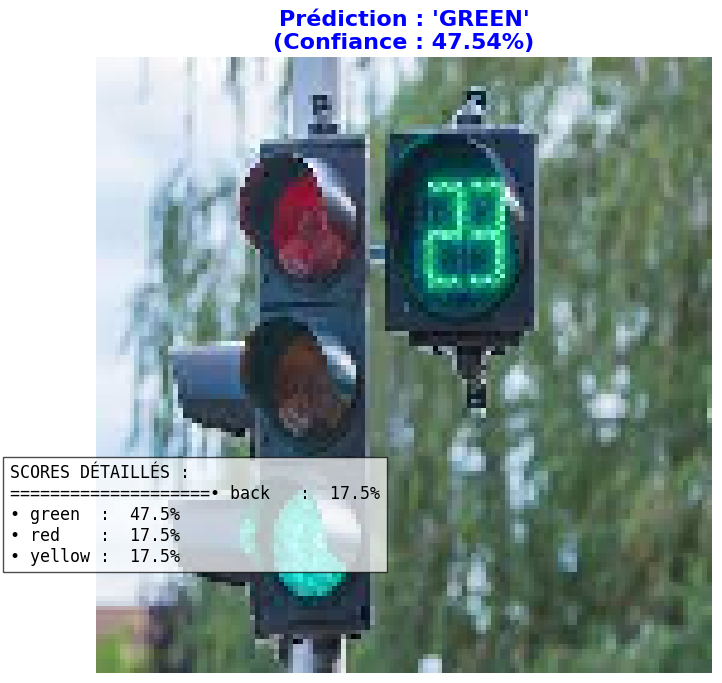

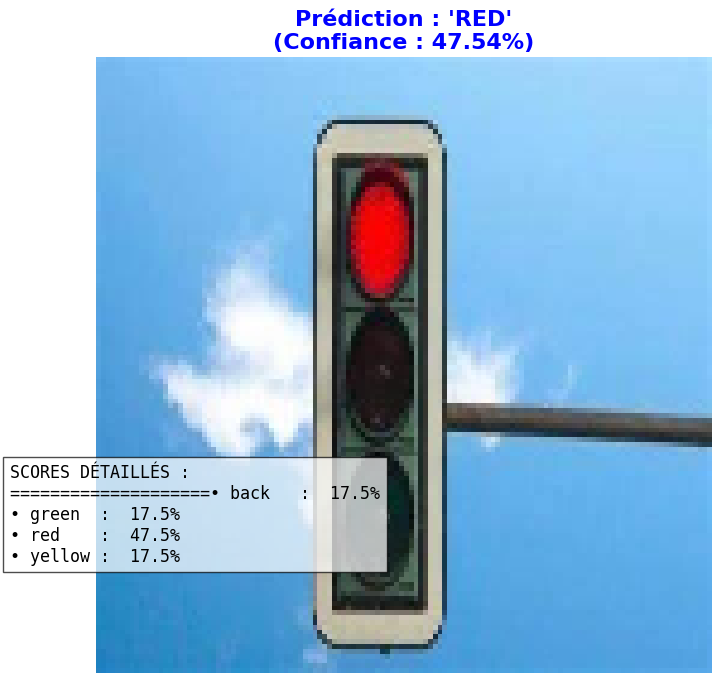

In [ ]:

# CELLULE 4 : TEST INTERACTIF SUR IMAGE LOCALE

import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import numpy as np
import matplotlib.pyplot as plt

# --- Paramètres ---
MODEL_PATH = 'traffic_light_classifier_final.keras'
IMG_HEIGHT, IMG_WIDTH = 128, 128
CLASS_NAMES = ['back', 'green', 'red', 'yellow']

# --- On doit redéfinir la fonction personnalisée pour que load_model la reconnaisse ---
def apply_random_brightness(x):
    return tf.image.random_brightness(x, 0.2)

# --- Chargement du modèle ---
print(" Chargement du modèle...")
if not os.path.exists(MODEL_PATH):
    print(f" ERREUR : Le modèle '{MODEL_PATH}' est introuvable.")
else:
    model = load_model(MODEL_PATH, custom_objects={'apply_random_brightness': apply_random_brightness})
    print(" Modèle chargé avec succès !")

def predict_image_from_path(file_path):
    try:
        if not os.path.exists(file_path):
            print(f" ERREUR : Le fichier '{file_path}' est introuvable.")
            return
        img = tf.keras.utils.load_img(file_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = tf.keras.utils.img_to_array(img)
        img_array_expanded = tf.expand_dims(img_array, 0)
        predictions = model.predict(img_array_expanded, verbose=0)
        score = tf.nn.softmax(predictions[0])
        predicted_class = CLASS_NAMES[np.argmax(score)]
        confidence = 100 * np.max(score)
        
        plt.figure(figsize=(8, 8)); plt.imshow(img)
        plt.title(f"Prédiction : '{predicted_class.upper()}'\n(Confiance : {confidence:.2f}%)", fontsize=16, fontweight='bold', color='blue'); plt.axis("off")
        scores_text = "SCORES DÉTAILLÉS :\n" + "="*20 + "\n".join([f"• {CLASS_NAMES[i]:<7}: {100*score[i]:>5.1f}%" for i in range(len(CLASS_NAMES))])
        plt.figtext(0.02, 0.25, scores_text, fontsize=12, family='monospace', bbox={"facecolor":"white", "alpha":0.7, "pad":5}); plt.show()
    except Exception as e:
        print(f" Erreur lors du traitement de l'image : {e}")

#  Boucle principale de l'interface 
if 'model' in locals():
    while True:
        path_input = input("\n Entrez le chemin de votre image (ou 'quitter') : ").strip().strip('"')
        if path_input.lower() == 'quitter': break
        predict_image_from_path(path_input)
    print("\n Fin de la session de test.")

In [1]:

# CELLULE 5 : DÉTECTION EN TEMPS RÉEL (WEBCAM)

import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import os

# --- Paramètres ---
MODEL_PATH = 'traffic_light_classifier_final.keras'
IMG_HEIGHT, IMG_WIDTH = 128, 128
CLASS_NAMES = ['back', 'green', 'red', 'yellow']

# --- Redéfinition de la fonction personnalisée pour le chargement ---
def apply_random_brightness(x):
    return tf.image.random_brightness(x, 0.2)

# --- Chargement du modèle ---
print(" Chargement du modèle...")
if not os.path.exists(MODEL_PATH):
    print(f" ERREUR : Modèle '{MODEL_PATH}' non trouvé.")
else:
    model = load_model(MODEL_PATH, custom_objects={'apply_random_brightness': apply_random_brightness})
    print(" Modèle chargé.")
    
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print(" ERREUR: Impossible d'ouvrir la webcam.")
    else:
        print("\n Lancement de la webcam... Cliquez sur la fenêtre et appuyez sur 'q' pour quitter.")
        while(cap.isOpened()):
            ret, frame = cap.read()
            if not ret: break
            
            display_frame = frame.copy()
            input_image = cv2.resize(frame, (IMG_WIDTH, IMG_HEIGHT))
            input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
            img_array_expanded = np.expand_dims(input_image_rgb, axis=0)
            
            predictions = model.predict(img_array_expanded, verbose=0)
            score = tf.nn.softmax(predictions[0])
            predicted_class = CLASS_NAMES[np.argmax(score)]
            confidence = 100 * np.max(score)
            
            text = f"{predicted_class.upper()} ({confidence:.2f}%)"
            color = (0, 255, 0) if predicted_class == 'green' else (0, 0, 255) if predicted_class == 'red' else (0, 255, 255) if predicted_class == 'yellow' else (255, 255, 255)
            
            cv2.rectangle(display_frame, (5, 5), (450, 45), (0, 0, 0), -1)
            cv2.putText(display_frame, text, (15, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color, 3)
            cv2.imshow('Detection en Temps Reel', display_frame)

            if cv2.waitKey(1) & 0xFF == ord('q'): break
                
        cap.release()
        cv2.destroyAllWindows()
        print(" Webcam arrêtée.")

 Chargement du modèle...

 Modèle chargé.

 Lancement de la webcam... Cliquez sur la fenêtre et appuyez sur 'q' pour quitter.
 Webcam arrêtée.
